### As diferenças entre Tensorflow e Keras: 

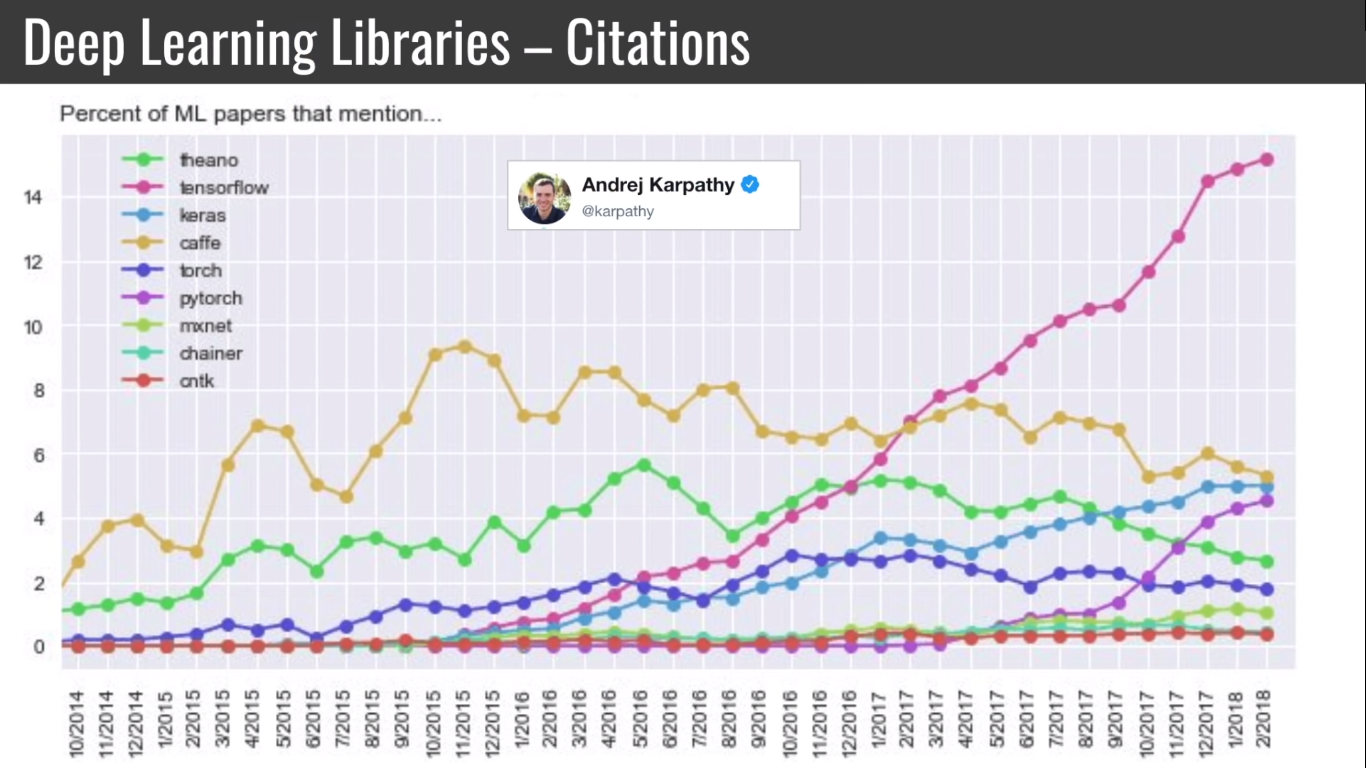

## Principais diferenças:

## Em 2017:
https://medium.com/implodinggradients/tensorflow-or-keras-which-one-should-i-learn-5dd7fa3f9ca0

#### "TensorFlow is not that easy to use. On the other hand, Keras is a high level API built on TensorFlow (and can be used on top of Theano too). It is more user-friendly and easy to use as compared to TF."

#### "If you want to quickly build and test a neural network with minimal lines of code, choose Keras. With Keras, you can build simple or very complex neural networks within a few minutes. The Model and the Sequential APIs are so powerful that you can do almost everything you may want. Let’s look at an example below:"

#### "Keras was developed in such a way that it should be more user-friendly and hence in a way more pythonic. Modularity is another elegant guiding principle of Keras. Everything in Keras can be represented as modules which can further be combined as per the user’s requirements."

### Flexibility

#### "Sometimes you just don’t want to use what is already there but you want to define something of your own (for example a cost function, a metric, a layer, etc.). "
#### "Although Keras 2 has been designed in such a way that you can implement almost everything you want but we all know that low-level libraries provides more flexibility. Same is the case with TF. You can tweak TF much more as compared to Keras."

### Threading and Queues

#### "Queues are a powerful mechanism for computing tensors asynchronously in a graph. Similarly, you can execute multiple threads for the same Session for parallel computations and hence speed up your operations. Below is a simple example showing how you can use queues and threads in TensorFlow. Here is a snippet:"

### Since then, TensorFlow 2 was released.

### Graph Mode

https://www.tensorflow.org/guide/graphs

#### "TensorFlow uses a dataflow graph to represent your computation in terms of the dependencies between individual operations. This leads to a low-level programming model in which you first define the dataflow graph, then create a TensorFlow session to run parts of the graph across a set of local and remote devices."
####    "This guide will be most useful if you intend to use the low-level programming model directly. Higher-level APIs such as tf.estimator.Estimator and Keras hide the details of graphs and sessions from the end user, but this guide may also be useful if you want to understand how these APIs are implemented."

### Constructon: Build the graph

In [1]:
import tensorflow as tf

x = tf.Variable(0.)
y = tf.Variable(1.)
add_op = x.assign(x + y)
div_op = y.assign(y / 2)
init = tf.global_variables_initializer()




Instructions for updating:
Colocations handled automatically by placer.


### Execution: Evaluate some nodes of the graph


In [6]:
with tf.Session() as sess:
    init.run()
    for iteration in range(50):
        sess.run(add_op)
        sess.run(div_op)
    print(x.eval())

2.0


#### If two operations are called in the same session of ses.run() tensorflow does't know the order of operation and thus the resultsis unpredictable

In [9]:
with tf.Session() as sess:
    init.run()
    for iteration in range(50):
        sess.run([add_op, div_op])
    print(x.eval())

1.9854174


### More on Graph Mode:

#### If a set of operations are placed directly on a GPU device, they will run there without all the back and forth with Python. This can significantly improve performance specially if the programing involves deep models and small batch sizes. 

### Eager Mode

https://www.tensorflow.org/guide/eager

#### "TensorFlow's eager execution is an imperative programming environment that evaluates operations immediately, without building graphs: operations return concrete values instead of constructing a computational graph to run later. This makes it easy to get started with TensorFlow and debug models, and it reduces boilerplate as well. To follow along with this guide, run the code samples below in an interactive python interpreter."

In [1]:
import tensorflow as tf

tf.enable_eager_execution()
x = tf.constant(0.)
y = tf.constant(1.)

for iteration in range(50):
    x = x + y
    y = y / 3

print(x.numpy())

1.5000001


In [3]:
print(tf.__version__)

1.13.1


### Example taken from: https://github.com/cameroncruz/notebooks/blob/master/Easy_Image_Classification_with_TF_2.ipynb

In [5]:
# Setup Kaggle API
!conda install kaggle
!mkdir -p ~/.kaggle

Solving environment: ...working... failed



PackagesNotFoundError: The following packages are not available from current channels:

  - kaggle

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/win-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


The syntax of the command is incorrect.


In [5]:
mv /content/kaggle.json ~/.kaggle/kaggle.json
chmod 600 ~/.kaggle/kaggle.json

'mv' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.
